#**<font color='red'>MAKE A COPY TO YOUR GOOGLE DRIVE </font>**
Please make a copy, by navigating to **File > Save a copy in Drive**. This is important as you may lose your progress otherwise.

Once completed, please download as a Python (.py) file and submit on Gradescope (navigate to **File > Download > Download .py**). The file name should be **pset3.py**.


Make sure as you are working through the notebook, you run all the cells as you go along (otherwise your code may produce errors or not work properly). Additionally, your code cells may de-load if the session has been running for too long; please periodically restart your runtime / run all your cells.

In completing the assignment, please complete the functions / classes / variables. Do **NOT** change the names of existing functions / classes / variables and their signature / input (or re-assign / redefine them) as this is what Gradescope parses for. Lastly, do not include or import additional libraries beyond the ones provided for the final submission (as Gradescope will reject them).

# Problem Set 3 (85 pts)

In this problem set, you'll explore topics related to odometry and wheel encoders. Unless specified otherwise, we will be working with a two wheeled differential drive robot with incremental optical encoders.

**Note**: the numbers used may not accurately reflect real life circumstances - they were chosen to be mathematically convenient. Furthermore, in practice, wheel odometry can be very noisy and has to often be paired with other sensors for higher accuracy localization.

**Several sections of this problem set are all short-response / calculations, thus in terms of feedback from GradeScope, it will be very limited**. This is to avoid simply guessing and checking your answer. However, to provide some assistance on whether you're on the right track, for some of the questions, GradeScope will provide information on correctness. For example, GradeScope will tell you whether you got the right values for time $t=5$ (i.e., we're giving you the answer on GradeScope) - since the questions build up on one another, if you successfully derived the correct answer for a question / quantity at time $t=5$, then it's a good sign (**but not a guarantee**) that your answers for time $t = \{1,2,3,4\}$ are probably correct (as the answers for time $t=5$ would **most likely (but not necessarily)** need the correct calculations to that point).

**In terms of numeric precision, please have 4 decimal point precision (if applicable) (e.g., 3.1415 has 4 decimal point precision). Additionally, only provide the numeric answer (do not include any units or other text in the answer field).**


## Robot Directional Motion (10 pts)

You have a two wheeled differential drive robot. On each motor is an incremental optical encoder. The optical encoder provides information on the rotation of the motor.

We can use the data from the encoders to determine the speed of each wheel. In this section, match the different scenarios of wheel speeds with their corresponding motion. For this problem set, the left and right direction of the robot is defined absolutely by the frontward orientation of the robot (i.e., imagine looking in the direction that is the robot's forward direction, that left will always be left regardless of whether robot is going forward or backwards); refer to the diagram below where the forward edge is indicated by the blue triangle indicators. Each question is 1 point.

<figure><center><img src='https://drive.google.com/uc?export=view&id=14r7MpVtQtlCoBGqMQtC0XtKyjXhSW5ze'/><figcaption><a href="https://drive.google.com/uc?export=view&id=14r7MpVtQtlCoBGqMQtC0XtKyjXhSW5ze">Click here if the image doesn't load</a></figcaption></center></figure>

In [ ]:
#@title Wheel Speed Scenarios

options = ["", "Forward Left", "Forward Straight", "Forward Right", "Backward Left", "Backward Straight", "Backward Right", "Stationary", "Spinning in Place"]

#@markdown #### Scenario1 (1 pt)
#@markdown The left wheel and right wheel are both moving forward, with the left wheel moving faster than the right.
scenario1 = "Forward Left" #@param ["", "Forward Left", "Forward Straight", "Forward Right", "Backward Left", "Backward Straight", "Backward Right", "Stationary", "Spinning in Place"]

#@markdown #### Scenario2 (1 pt)
#@markdown The left and right wheel are moving at same speed, but in opposite directions of each other.
scenario2 = "Stationary" #@param ["", "Forward Left", "Forward Straight", "Forward Right", "Backward Left", "Backward Straight", "Backward Right", "Stationary", "Spinning in Place"]

#@markdown #### Scenario3 (1 pt)
#@markdown The left and right wheel are moving at same speed in the forward direction.
scenario3 = "Forward Straight" #@param ["", "Forward Left", "Forward Straight", "Forward Right", "Backward Left", "Backward Straight", "Backward Right", "Stationary", "Spinning in Place"]

#@markdown #### Scenario4 (1 pt)
#@markdown The left wheel is moving backwards and the right wheel is moving forward. The speed of the right wheel is greater than the speed of the left wheel.
scenario4 = "Backward Right" #@param ["", "Forward Left", "Forward Straight", "Forward Right", "Backward Left", "Backward Straight", "Backward Right", "Stationary", "Spinning in Place"]

#@markdown #### Scenario5 (1 pt)
#@markdown  The left and right wheel are moving at same speed in the backward direction.
scenario5 = "Backward Straight" #@param ["", "Forward Left", "Forward Straight", "Forward Right", "Backward Left", "Backward Straight", "Backward Right", "Stationary", "Spinning in Place"]

#@markdown #### Scenario6 (1 pt)
#@markdown  The left wheel is moving faster than the right wheel in the opposite direction. The right wheel is spinning forward.
scenario6 = "Backward Left" #@param ["", "Forward Left", "Forward Straight", "Forward Right", "Backward Left", "Backward Straight", "Backward Right", "Stationary", "Spinning in Place"]

#@markdown #### Scenario7 (1 pt)
#@markdown  Both wheels are not spinning.
scenario7 = "Stationary" #@param ["", "Forward Left", "Forward Straight", "Forward Right", "Backward Left", "Backward Straight", "Backward Right", "Stationary", "Spinning in Place"]

#@markdown #### Scenario8 (1 pt)
#@markdown  Only the left wheel is spinning forward and the right wheel can rotate / turn in place.
scenario8 = "Spinning in Place" #@param ["", "Forward Left", "Forward Straight", "Forward Right", "Backward Left", "Backward Straight", "Backward Right", "Stationary", "Spinning in Place"]

#@markdown #### Scenario9 (1 pt)
#@markdown  Only the right wheel is spinning backward and the left wheel can rotate / turn in place.
scenario9 = "Spinning in Place" #@param ["", "Forward Left", "Forward Straight", "Forward Right", "Backward Left", "Backward Straight", "Backward Right", "Stationary", "Spinning in Place"]

#@markdown #### Scenario10 (1 pt)
#@markdown  Both wheels are moving backward. The right wheel is spinning faster than the left wheel.
scenario10 = "Backward Right" #@param ["", "Forward Left", "Forward Straight", "Forward Right", "Backward Left", "Backward Straight", "Backward Right", "Stationary", "Spinning in Place"]


## Incremental Optical Encoder Model (10 pts)

In this section, you'll explore the data from the incremental optical encoders located on the motors for the wheels. An incremental optical encoder functions by having an electric circuit that is connected to a photo sensor which influences the amount of voltage in the circuit. There is a disk that separates the circuit with the photo sensor from a light emitting diode (LED). The disk is comprised of slits and rotates with the motor. As the disk rotates, light passes through the slits which will be detected by the photo sensor and affect the voltage of the circuit, thus capturing the rotation. The slits are equally spaced and represent some fixed unit of rotation.

<figure><center><img src='https://drive.google.com/uc?export=view&id=12C2DbfEN38d6dnTLzIYY12V5Bzk9TZm6'/><figcaption><a href="https://drive.google.com/uc?export=view&id=12C2DbfEN38d6dnTLzIYY12V5Bzk9TZm6">Click here if the image doesn't load</a></figcaption></center></figure>

For notation purposes, unless specified otherwise, we'll be using subscript $_L$ and subscript $_R$ to denote left and right, respectively.

You collect 5 measurements of data from the incremental optical encoder at each wheel, starting at time $t=0$ to time $t=5$. Each wheel encoder keeps track of the total number of slits that the encoder has passed. Thus, the measurement at each time step represents the total number of slits seen up to that time step. The total number of slits will increase in value for counter clockwise rotation, which translates to moving in the forward direction - in this scenario, the distance of the wheel will be positive. Whereas when the rotation is clockwise, this translates to backward motion and will result in the total number of slits decreasing - in this scenario, the distance of the wheel will be negative.

Here are the measurements from each encoder, with $E_L$ representing the encoder measurements from the motor for the left wheel and $E_R$ representing the encoder measurements from the motor for the right wheel:

\begin{align}
E_L &= \begin{bmatrix}0 & \text{ }48 & \text{ }30 & \text{ }33\text{ } & \text{ }21\text{ } & \text{ }51\text{ } \end{bmatrix} \\
E_R &= \begin{bmatrix}0 & \text{ }12 & \text{ }72 & 135 & 171 & 201 \end{bmatrix}
\end{align}


For our robot, the circumference of the left wheel, $C_L$, and the circumference of the right wheel, $C_R$, will both be equal to $6$. The total number of slits on the left encoder, $T_L$, and the total number of slits on the right encoder, $T_R$, will both be equal to $72$.

Let $d_{i, t}$ be the distance travelled by wheel $i$ at time $t$ (more precisely, the incremental distance traveled between timesteps). Determine the values for $d_{L, t}$ and $d_{R, t}$ for $t = \{1,2,3,4,5\}$. In laymans terms, find the (incremental) distance traveled by the left wheel and the right wheel at each time step from $t=1$ to $t=5$.

**Hint**: Let's define $s_{i,t}$ to be the total number of slits passed by the encoder for wheel $i$ at time $t$. We can determine the amount of distance of wheel $i$ at time $t$ by this formula:
$$
d_{i, t} = \frac{s_{i, t} - s_{i, t-1}}{T_i}C_i
$$

In [ ]:
#@title Left Optical Encoder (5 pts)

#@markdown **In terms of numeric precision, please have 4 decimal point precision (if applicable) (e.g., 3.1415 has 4 decimal point precision). Additionally, only provide the numeric answer (do not include any units or other text in the answer field).**

#@markdown Left wheel distance at time $t = 1$ (1 pt)
distance_left_wheel_time_1 = "4" #@param {type: "string"}

#@markdown Left wheel distance at time $t = 2$ (1 pt)
distance_left_wheel_time_2 = "-1.5" #@param {type: "string"}

#@markdown Left wheel distance at time $t = 3$ (1 pt)
distance_left_wheel_time_3 = "0.25" #@param {type: "string"}

#@markdown Left wheel distance at time $t = 4$ (1 pt)
distance_left_wheel_time_4 = "-1" #@param {type: "string"}

#@markdown Left wheel distance at time $t = 5$ (1 pt)
distance_left_wheel_time_5 = "2.5" #@param {type: "string"}


In [ ]:
#@title Right Optical Encoder (5 pts)

#@markdown **In terms of numeric precision, please have 4 decimal point precision (if applicable) (e.g., 3.1415 has 4 decimal point precision). Additionally, only provide the numeric answer (do not include any units or other text in the answer field).**

#@markdown Right wheel distance at time $t = 1$ (1 pt)
distance_right_wheel_time_1 = "1" #@param {type: "string"}

#@markdown Right wheel distance at time $t = 2$ (1 pt)
distance_right_wheel_time_2 = "5" #@param {type: "string"}

#@markdown Right wheel distance at time $t = 3$ (1 pt)
distance_right_wheel_time_3 = "5.25" #@param {type: "string"}

#@markdown Right wheel distance at time $t = 4$ (1 pt)
distance_right_wheel_time_4 = "3" #@param {type: "string"}

#@markdown Right wheel distance at time $t = 5$ (1 pt)
distance_right_wheel_time_5 = "2.5" #@param {type: "string"}

## Wheel Odometry Model - Relative Motion (10 pts)

For our wheel odometry model, we'll treat our robot as a singular point that is located equidistant between the two, parallel wheels. This singular point will serve as the reference point for the robot. The distance between the reference point and a wheel is $d_w = 2$.


<figure><center><img src='https://drive.google.com/uc?export=view&id=1M2B4nShthiEGCUWwVly4b1ni_49GCSgC'/><figcaption><a href="https://drive.google.com/uc?export=view&id=1M2B4nShthiEGCUWwVly4b1ni_49GCSgC">Click here if the image doesn't load</a></figcaption></center></figure>

Using the encoder values, $E_L$ and $E_R$, from the previous section, determine the (incremental) distance traveled by the reference point for time $t=1$ to time $t=5$. Additionally, determine the (incremental) $\Delta \theta$, **in radians**, for time $t=1$ to time $t=5$.

**Hint**: refer to the odometry model covered in this article: [Wheel Odometry Model for Differential Drive Robotics](https://medium.com/@nahmed3536/wheel-odometry-model-for-differential-drive-robotics-91b85a012299)

In [ ]:
#@title Reference Point Distance (5 pts)

#@markdown **In terms of numeric precision, please have 4 decimal point precision (if applicable) (e.g., 3.1415 has 4 decimal point precision). Additionally, only provide the numeric answer (do not include any units or other text in the answer field).**

#@markdown Reference point distance at time $t = 1$ (1 pt)
distance_reference_point_time_1 = "2.5" #@param {type: "string"}

#@markdown Reference point distance at time $t = 2$ (1 pt)
distance_reference_point_time_2 = "1.75" #@param {type: "string"}

#@markdown Reference point distance at time $t = 3$ (1 pt)
distance_reference_point_time_3 = "2.75" #@param {type: "string"}

#@markdown Reference point distance at time $t = 4$ (1 pt)
distance_reference_point_time_4 = "1" #@param {type: "string"}

#@markdown Reference point distance at time $t = 5$ (1 pt)
distance_reference_point_time_5 = "2.5" #@param {type: "string"}


In [ ]:
#@title $\Delta \theta$ (5 pts)

#@markdown **In terms of numeric precision, please have 4 decimal point precision (if applicable) (e.g., 3.1415 has 4 decimal point precision). Additionally, only provide the numeric answer (do not include any units or other text in the answer field).**

#@markdown $\Delta \theta$ at time $t = 1$ (1 pt)
delta_theta_time_1 = "-0.75" #@param {type: "string"}

#@markdown $\Delta \theta$ at time $t = 2$ (1 pt)
delta_theta_time_2 = "1.625" #@param {type: "string"}

#@markdown $\Delta \theta$ at time $t = 3$ (1 pt)
delta_theta_time_3 = "1.25" #@param {type: "string"}

#@markdown $\Delta \theta$ at time $t = 4$ (1 pt)
delta_theta_time_4 = "1" #@param {type: "string"}

#@markdown $\Delta \theta$ at time $t = 5$ (1 pt)
delta_theta_time_5 = "0" #@param {type: "string"}


## Wheel Odometry Model - Absolute Position (10 pts)

In the previous section, we calculated the relative change in distance and angle for the robot between time steps. We can translate this to an absolute position if the start position and orientation is know.

In this section, let's model the robot's terrain as a coordinate plane. At time $t=0$, the robot is at position $(0,0)$ facing forward in the right / positive `x`-direction (more precisely, has absolute orientation of 0 radians). Based on this initial starting point and orientation, determine the absolute position of the robot at each time step from time $t=1$ to time $t=5$. Note: the numbers for this section might be more "messy" because trig functions are getting involved.

**Hint**: We can model the dynamics of the robot with:

$$
\begin{align}
\begin{bmatrix}
           x_{t}\\
           y_{t}\\
           \theta_{t}
    \end{bmatrix} =
    \begin{bmatrix}
           x_{t-1}\\
           y_{t-1}\\
           \theta_{t-1}
    \end{bmatrix} +
    \begin{bmatrix}
           d_t\cos(\theta_{t-1} + \frac{\Delta\theta_t}{2})\\
           d_t\sin(\theta_{t-1} + \frac{\Delta\theta_t}{2})\\
           \Delta \theta_t
    \end{bmatrix}
\end{align}
$$

where $d_t$ is the distance travelled by the reference point at time $t$ and $\Delta \theta_t$ is the $\Delta \theta$ or rotation at time $t$. For more details, refer to the odometry model covered in this article: [Wheel Odometry Model for Differential Drive Robotics](https://medium.com/@nahmed3536/wheel-odometry-model-for-differential-drive-robotics-91b85a012299). Also make sure to use the right units (i.e., radians or degrees).


In [ ]:
#@title Absolute Position

#@markdown **In terms of numeric precision, please have 4 decimal point precision (if applicable) (e.g., 3.1415 has 4 decimal point precision). Additionally, only provide the numeric answer (do not include any units or other text in the answer field).**

#@markdown Reference point $(x, y)$ coordinate at time $t = 1$ (2 pts - the $x$ and $y$ are each 1 point)
x_coordinate_absolute_position_time_1 = "2.3263" #@param {type: "string"}
y_coordinate_absolute_position_time_1 = "-0.9157" #@param {type: "string"}

#@markdown Reference point $(x, y)$ coordinate at time $t = 2$ (2 pts - the $x$ and $y$ are each 1 point)
x_coordinate_absolute_position_time_2 = "4.0729" #@param {type: "string"}
y_coordinate_absolute_position_time_2 = "-0.8064" #@param {type: "string"}

#@markdown Reference point $(x, y)$ coordinate at time $t = 3$ (2 pts - the $x$ and $y$ are each 1 point)
x_coordinate_absolute_position_time_3 = "4.2674" #@param {type: "string"}
y_coordinate_absolute_position_time_3 = "1.9367" #@param {type: "string"}

#@markdown Reference point $(x, y)$ coordinate at time $t = 4$ (2 pts - the $x$ and $y$ are each 1 point)
x_coordinate_absolute_position_time_4 = "3.3979" #@param {type: "string"}
y_coordinate_absolute_position_time_4 = "2.4307" #@param {type: "string"}

#@markdown Reference point $(x, y)$ coordinate at time $t = 5$ (2 pts - the $x$ and $y$ are each 1 point)
x_coordinate_absolute_position_time_5 = "0.8982" #@param {type: "string"}
y_coordinate_absolute_position_time_5 = "2.4721" #@param {type: "string"}

## Wheel Odometry Implementation (20 pts)

In the previous sections, we manually calculated the results from the wheel odometry model. In this section, we will implement the model using NumPy (based on the models derived in [Wheel Odometry Model for Differential Drive Robotics](https://medium.com/@nahmed3536/wheel-odometry-model-for-differential-drive-robotics-91b85a012299)).

In [1]:
### DO NOT CHANGE ###
# importing the libraries (do not remove or add libraries)
import numpy as np
import matplotlib.pyplot as plt

### Distance Traveled (5 pts)

Implement the `distance_traveled` function which calculates the distance traveled by the vehicle given `dL` and `dR` which will be 1-dimensional numpy arrays of the distances traveled by the left and right wheel at each time step starting at time $t=1$ respectively. Assume that `dL` and `dR` will be the same length. The output will be a 1-dimensional numpy array that has the same number of values / length as `dL` and `dR`.

**Example 1**:
```python
dL = np.array([1, 1, 1, 1, 1])
dR = np.array([2, 2, 3, 3, 2])

distance_traveled(dL, dR) = np.array([1.5, 1.5, 2, 2, 1.5])
```
Explanation: this solves for the distance traveled at each time step by using the formula $d_t = \frac{d_{L, t}+d_{R, t}}{2}$, where the values for $d_{L, t}$ come from the array `dL` and the values for $d_{R, t}$ come from the array `dR`. The formula is calculated between values from `dL` and `dR` that are at the same index which correspond to being at the same time step $t$.

**Example 2**:
```python
dL = np.array([2, 1.5, 4, 3.5, 4.5])
dR = np.array([2, 2, -2, -1, -0.5])

distance_traveled(dL, dR) = np.array([2, 1.75, 1, 1.25, 2])
```
Explanation: this solves for the distance traveled at each time step by using the formula $d_t = \frac{d_{L, t}+d_{R, t}}{2}$, where the values for $d_{L, t}$ come from the array `dL` and the values for $d_{R, t}$ come from the array `dR`. The formula is calculated between values from `dL` and `dR` that are at the same index which correspond to being at the same time step $t$.


In [2]:
def distance_traveled(dL: np.ndarray, dR: np.ndarray) -> np.ndarray:
    return (dL + dR) / 2

### Delta Theta (5 pts)

Implement the `delta_theta` function which calculates the delta theta / angle of rotation in radians of the vehicle given `dL` and `dR` which will be 1-dimensional numpy arrays of the distances traveled by the left and right wheel at each time step starting at time $t=1$ respectively and `dw` which will be a number representing the distance between the reference point and the left / right wheel (the reference point is assumed to be equidistant from both wheels). Assume that `dL` and `dR` will be the same length. Assume that `d_w` will be a non-zero positive number. The output will be a 1-dimensional numpy array that has the same number of values / length as `dL` and `dR`.

**Example 1**:
```python
dL = np.array([1, 1, 1, 1, 1])
dR = np.array([2, 2, 3, 3, 2])
dw = 2

delta_theta(dL, dR, dw) = np.array([0.25, 0.25, 0.5, 0.5, 0.25])
```
Explanation: this solves for the delta theta at each time step by using the formula $\Delta \theta_t = \frac{d_{R, t}-d_{L, t}}{2d_w}
$, where the values for $d_{L, t}$ come from the array `dL`, the values for $d_{R, t}$ come from the array `dR`, and the value for $d_w$ comes from `dw`. The formula is calculated between values from `dL` and `dR` that are at the same index which correspond to being at the same time step $t$.

**Example 2**:
```python
dL = np.array([2, 1.5, 4, 3.5, 4.5])
dR = np.array([2, 2, -2, -1, -0.5])
dw = 2.5

delta_theta(dL, dR, dw) = np.array([0, 0.1, -1.2, -0.9, -1])
```
Explanation: this solves for the delta theta at each time step by using the formula $\Delta \theta_t = \frac{d_{R, t}-d_{L, t}}{2d_w}
$, where the values for $d_{L, t}$ come from the array `dL`, the values for $d_{R, t}$ come from the array `dR`, and the value for $d_w$ comes from `dw`. The formula is calculated between values from `dL` and `dR` that are at the same index which correspond to being at the same time step $t$.

In [3]:
def delta_theta(dL: np.ndarray, dR: np.ndarray, dw: float) -> np.ndarray:
    return (dR - dL) / (2 * dw)

### Vehicle Path (10 pts)

The distance traveled and the delta theta provide information on the relative motion of the vehicle (i.e., how much did the vehicle travel and rotate from one time step to the next). This information can be related to a fixed coordinate system when given an initial state with $x_0$, $y_0$, and $\theta_0$. The $x_0$ and $y_0$ represent the initial coordinate point $(x_0, y_0)$ at time $t = 0$ that the vehicle starts off at on the fixed coordinate plane. The $\theta_0$ represents the initial orientation or angle from the positive $x$-axis at time $t=0$ on the fixed coordinate plane.

Recall the equations for absolute motion are defined with these three equations:

$$
\begin{align}
x_t &= x_{t-1} + d_t \cos \Bigg(\theta_{t-1} + \frac{\Delta \theta_t}{2} \Bigg) \\
y_t &= y_{t-1} + d_t \sin \Bigg(\theta_{t-1} + \frac{\Delta \theta_t}{2} \Bigg) \\
\theta_t &= \theta_{t-1} + \Delta \theta_t
\end{align}
$$

When working with absolute motion, we can treat the coordinate position and orientation angle as a state and represent it as a vector:

$$
\begin{bmatrix}
x_t \\
y_t  \\
\theta_t
\end{bmatrix}
$$

where $x_t$ is the $x$-position at time $t$, $y_t$ is the $y$-position at time $t$, and $\theta_t$ is the orientation at $t$. With this representation, we can then re-express the absolute motion equations as a vector equation that recursively updates the state from the previous time step as:

$$
\begin{bmatrix}
x_t \\
y_t  \\
\theta_t
\end{bmatrix}
= \begin{bmatrix}
x_{t-1} + d_t \cos \left(\theta_{t-1} + \frac{\Delta \theta_t}{2}\right) \\
y_{t-1} + d_t \sin \left(\theta_{t-1} + \frac{\Delta \theta_t}{2}\right) \\
\theta_{t-1} + \Delta \theta_t
\end{bmatrix}
$$

or as

$$
\begin{bmatrix}
x_t \\
y_t  \\
\theta_t
\end{bmatrix}
=
\begin{bmatrix}
x_{t-1} \\
y_{t-1}  \\
\theta_{t-1}
\end{bmatrix} + \begin{bmatrix}
d_t \cos \left(\theta_{t-1} + \frac{\Delta \theta_t}{2}\right) \\
d_t \sin \left(\theta_{t-1} + \frac{\Delta \theta_t}{2}\right) \\
\Delta \theta_t
\end{bmatrix}
$$

In our implementation, we will represent the absolute position and orientation at a particular time step with a state vector. Then, the path of the vehicle (i.e., the states over time) can be represented as a matrix or collection of state vectors.

For our implementation, our state vector will be a numpy array of shape `(3, 1)` which means it has 3 rows and 1 column. The first row corresponds to the $x$-position, the second row corresponds to the $y$-position, and the third row corresponds to the $\theta$ / orientation angle in radians.

The path of the vehicle will be a numpy array of shape `(3, T)` which means it has 3 rows and `T` columns where `T` is the total number of time steps (starting at time $t=0$). The first row corresponds to the $x$-position, the second row corresponds to the $y$-position, and the third row corresponds to the $\theta$ / orientation angle in radians.  The columns will represent each time step, with the index corresponding to the time step (i.e., time step $t=0$ corresponds to the column at index `0`, time step $t=1$ corresponds to the column at index `1`, etc.)

Implement `vehicle_path` which calculates the path traveled by the vehicle given `dist` and `dtheta` which will be 1-dimensional numpy arrays of the distances traveled and the delta thetas / change in rotation at each time step from the relative motion model starting at time $t=1$ respectively and `initial_state` which will be a state vector / numpy array of shape `(3, 1)`. Assume that `dist` and `dtheta` will be the same length. Assume `initial_state` is a valid state vector where the first row corresponds to the $x$-position, the second row corresponds to the $y$-position, and the third row corresponds to the $\theta$ / orientation angle in radians. The output will be a path matrix which is a numpy array with shape `(3, T)`, where each column represents a state vector and `T` represents the total number of time steps (starting at time $t = 0$). Note: since the path matrix starts at time $t=0$ and the `dist` and `dtheta` start at time $t=1$, the number of columns in the path matrix will be one more than the number of values or length of `dist` and `dtheta`.

**Hint**: pay attention to the shape of the state vector and path matrix!

**Example 1**:
```python
dist = np.array([1.5, 1.5, 2, 2, 1.5])
dtheta = np.array([0.25, 0.25, 0.5, 0.5, 0.25])
initial_state = np.array([
    [-2],   # x-position
    [4],    # y-position
    [4.6]   # theta / orientation in radians
])

vehicle_path(dist, dtheta, initial_state) = np.array([
    [-2, -1.98108397, -1.59167957, -0.40112447, 1.41414209, 2.91160365],
    [4, 2.50011928, 1.05154611, -0.5554942, -1.39502223, -1.48225096],
    [4.6, 4.85, 5.1, 5.6, 6.1, 6.35]
])
```
Explanation: this solves the absolute motion at each time step using the relevant equations. For the first row, it uses the equation for $x_t$, for the second row, it uses the equation for $y_t$, and the third row, it uses the equation for $\theta_t$, substituting in $d_t$ and $\Delta \theta_t$ values from `dist` and `dtheta` respectively matching the corresponding index to the relevant time step. Note: the first column of the path corresponds to the `initial_state`, hence the values are identical.

**Example 2**:
```python
dist = np.array([2, 1.75, 1, 1.25, 2])
dtheta = np.array([0, 0.1, -1.2, -0.9, -1])
initial_state = np.array([
    [-3],   # x-position
    [-3],   # y-position
    [1]     # theta / orientation in radians
])

vehicle_path(dist, dtheta, initial_state) = np.array([
    [-3, -1.91939539, -1.04864605,-0.17106349, 0.89459216, 1.03606656],
    [-3, -1.31705803, 0.20093261, 0.68035815, 0.02699912, -1.96799086],
    [1, 1, 1.1, -0.1, -1, -2]
])
```
Explanation: this solves the absolute motion at each time step using the relevant equations. For the first row, it uses the equation for $x_t$, for the second row, it uses the equation for $y_t$, and the third row, it uses the equation for $\theta_t$, substituting in $d_t$ and $\Delta \theta_t$ values from `dist` and `dtheta` respectively matching the corresponding index to the relevant time step. Note: the first column of the path corresponds to the `initial_state`, hence the values are identical.

In [4]:
def vehicle_path(dist: np.ndarray, dtheta: np.ndarray, initial_state: np.ndarray) -> np.ndarray:
    T = len(dist)

    path = np.zeros((3, T + 1))
    path[:, 0] = initial_state[:, 0]

    for t in range(1, T + 1):
        prev_theta = path[2, t - 1]
        mid_theta = prev_theta + dtheta[t - 1] / 2.0

        dx = dist[t - 1] * np.cos(mid_theta)
        dy = dist[t - 1] * np.sin(mid_theta)

        path[0, t] = path[0, t - 1] + dx  # x_t
        path[1, t] = path[1, t - 1] + dy  # y_t
        path[2, t] = path[2, t - 1] + dtheta[t - 1]  # theta_t

    return path


## Wheel Odometry Path Analysis (20 pts)

Now that we've implemented our wheel odometry model, we can visualize the path of a vehicle from the data collected by the wheel encoders (i.e., the distances traveled by the wheels).

In the below code snippet, assuming that the functions `distance_traveled`, `delta_theta`, and `vehicle_path` are **complete and correct** (or **at least providing the correct output for the example cases**) from the Wheel Odometry Implementation section, we can plot the path of the vehicle over our coordinate system using the function `visualize_path`. The function `visualize_path` takes the following input:
* `dL`: the distances traveled by the left wheel starting at time $t=1$
* `dR`: the distances traveled by the right wheel starting at time $t=1$
* `dw`: the distance between the reference point and the left / right wheel (assuming the distance is equidistant from both wheels)
* `initial_state`: a numpy array of shape `(3, 1)` where the first row corresponds to the $x$-position, the second row corresponds to the $y$-position, and the third row corresponds to the $\theta$ / orientation angle in radians for the vehicle at time $t = 0$
* `color`: the color to use to plot the vehicle's path on the graph; by default, it will be `red`
* `existing_figure`: provide an existing figure to add the visualization on top of - this lets us stack multiple vehicle paths on the same graph; by default, it will assume there is `None` and create a new figure

The output of the `visualize_path` function is a figure of the vehicle's path, shown on the $x$-range of `-5` to `5` and the $y$-range of `-5` to `5`.

In [5]:
### DO NOT CHANGE ###
def visualize_path(
    dL: np.ndarray,
    dR: np.ndarray,
    dw: float,
    initial_state: np.ndarray,
    color: str = "red",
    existing_figure: plt.Figure | None = None) -> plt.figure:
    """
    Visualizes the path based on the provided parameters.

    Parameters:
    - `dL`: the distances traveled by the left wheel starting at time t = 1
    - `dR`: the distances traveled by the right wheel starting at time t = 1
    - `dw`: the distance between the reference point and the left / right wheel
        (assuming the distance is equidistant from both wheels)
    - `initial_state`: a numpy array of shape `(3, 1)` where the first row
        corresponds to the x-position, the second row corresponds to the
        y-position, and the third row corresponds to the \theta / orientation
        angle in radians for the vehicle at time t = 0
    - `color`: the color to use to plot the vehicle's path on the graph;
        by default, it will be `red`
    - `existing_figure`: provide an existing figure to add the visualization on
        top of - this lets us stack multiple vehicle paths on the same graph;
        by default, it will assume there is `None` and create a new figure

    Returns: the figure with the plotted path
    """
    # get the path
    try:
        dist = distance_traveled(dL, dR)
        dtheta = delta_theta(dL, dR, dw)
        path = vehicle_path(dist, dtheta, initial_state)

        # use existing figure or create a new one
        if existing_figure:
            fig = existing_figure
        else:
            fig = plt.figure(figsize=(8, 8))

        # add the path to the figure as scatter with labels
        ax = fig.gca()
        x = path[0]
        y = path[1]
        for t, (xt, yt) in enumerate(zip(x, y)):
            plt.scatter(xt, yt, marker="o", color=color, zorder=100)
            ax.text(xt, yt + 0.3, rf'$t_{t}$', color=color, fontsize=12, ha='center')

        # add directional / orientation arrows
        theta = path[2]
        dx = np.cos(theta)
        dy = np.sin(theta)
        ax.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=1, color=color,
                linewidth=0.5, headwidth=3, headlength=4)
    except Exception as e:
        print(f"Implementation for `distance_traveled`, `delta_theta`, and `vehicle_path` incomplete / incorrect \nor the cells containing the function was not executed / ran. \nFound error: {e}")
        return

    # style the graph (set the size, ratio, axes, labels, etc.)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal')

    ax.grid(True, color='gray', linestyle='-', linewidth=0.25)
    ticks = list(range(-5, 6, 1))
    ticks.remove(0)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks, fontsize=6)
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticks, fontsize=6)
    plt.scatter(0, 0, marker="o", s=100, color="white", edgecolor="black",
                linewidth=2, zorder=100)

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # return the figure
    return fig

### Vehicle Path 1

Let's use the `visualize_path` function using the values for `dL`, `dR`, `dw`, and `initial_state` from Example 1 in the Wheel Odometry Implementation section. Run the below cell after completing the functions `distance_traveled`, `delta_theta`, and `vehicle_path`. Make sure to run the cells containing those functions and the cell containing the function `visualize_path`.

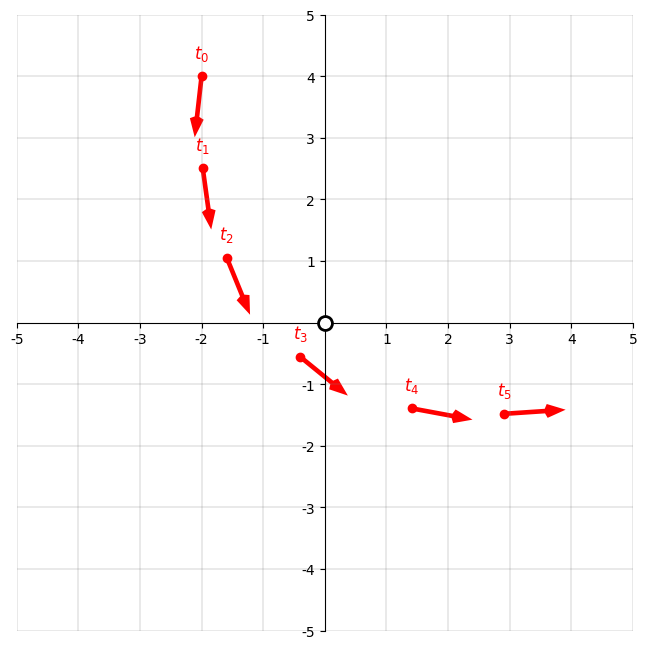

In [6]:
### DO NOT CHANGE ###
if __name__ == "__main__":
    try:
        # Example 1 Vehicle Path
        dL = np.array([1, 1, 1, 1, 1])
        dR = np.array([2, 2, 3, 3, 2])
        dw = 2
        initial_state = np.array([
            [-2],   # x-position
            [4],    # y-position
            [4.6]   # theta / orientation in radians
        ])
        fig = visualize_path(dL, dR, dw, initial_state)
        fig.show()
    except:
        pass

In [ ]:
#@title Vehicle Path 1 (5 pts)
#@markdown Which statement best describes the path or trajectory of vehicle 1?
vehicle_path1 = "the vehicle is gradually turning" # @param ["", "the vehicle is mostly going straight", "the vehicle is making a U-turn / 180-degree turn", "the vehicle is making a sudden, sharp 90-degree turn", "the vehicle went forward and then went in reverse / backwards", "the vehicle is gradually turning"]


### Vehicle Path 2

Let's use the `visualize_path` function using the values for `dL`, `dR`, `dw`, and `initial_state` from Example 2 in the Wheel Odometry Implementation section. Run the below cell after completing the functions `distance_traveled`, `delta_theta`, and `vehicle_path`. Make sure to run the cells containing those functions and the cell containing the function `visualize_path`.

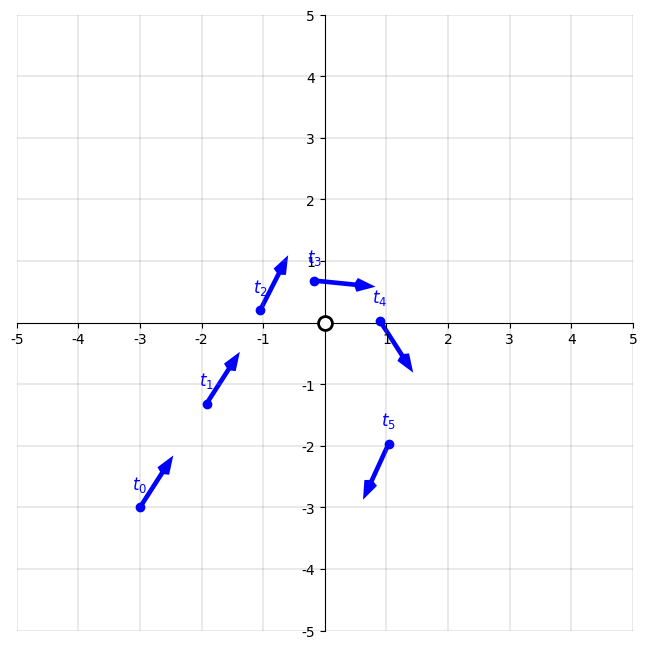

In [7]:
### DO NOT CHANGE ###
if __name__ == "__main__":
    try:
        # Example 2 Vehicle Path
        dL = np.array([2, 1.5, 4, 3.5, 4.5])
        dR = np.array([2, 2, -2, -1, -0.5])
        dw = 2.5
        initial_state = np.array([
            [-3],   # x-position
            [-3],   # y-position
            [1]     # theta / orientation in radians
        ])
        fig = visualize_path(dL, dR, dw, initial_state, color="blue")
        fig.show()
    except:
        pass

In [ ]:
#@title Vehicle Path 2 (5 pts)
#@markdown Which statement best describes the path or trajectory of vehicle 2?
vehicle_path2 = "the vehicle is making a U-turn / 180-degree turn" # @param ["", "the vehicle is mostly going straight", "the vehicle is making a U-turn / 180-degree turn", "the vehicle is making a sudden, sharp 90-degree turn", "the vehicle went forward and then went in reverse / backwards", "the vehicle is gradually turning"]

### Vehicle Path 1 and Vehicle Path 2

Let's use the `visualize_path` function to see the path from Example 1 and Example 2 in the Wheel Odometry Implementation section simultaneously on the same coordinate system. Run the below cell after completing the functions `distance_traveled`, `delta_theta`, and `vehicle_path`. Make sure to run the cells containing those functions and the cell containing the function `visualize_path`.

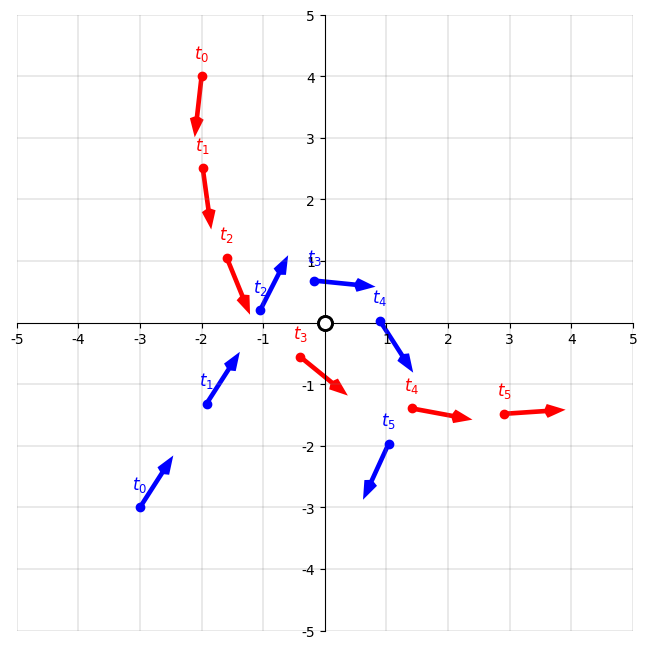

In [8]:
### DO NOT CHANGE ###
if __name__ == "__main__":
    try:
        # Example 1 Vehicle Path
        dL = np.array([1, 1, 1, 1, 1])
        dR = np.array([2, 2, 3, 3, 2])
        dw = 2
        initial_state = np.array([
            [-2],   # x-position
            [4],    # y-position
            [4.6]   # theta / orientation in radians
        ])
        fig = visualize_path(dL, dR, dw, initial_state)

        # Example 2 Vehicle Path
        dL = np.array([2, 1.5, 4, 3.5, 4.5])
        dR = np.array([2, 2, -2, -1, -0.5])
        dw = 2.5
        initial_state = np.array([
            [-3],   # x-position
            [-3],   # y-position
            [1]     # theta / orientation in radians
        ])
        fig = visualize_path(dL, dR, dw, initial_state, color="blue", existing_figure=fig)
        fig.show()
    except:
        pass

With both vehicle paths plotted on the same coordinate system, it is now much easier to notice when the two vehicles are getting too close each other. Detecting this can allow the vehicle to course-correct and get more distance from the other vehicle (in the case of an autonomous vehicle or retrofitted vehicle for autonomy solution) and / or alert the staff of potential safety risks (such as in the case of an AI monitoring solution).

A potential metric to determine how close two vehicles are is the Euclidean distance. The Euclidean distance, $D$ between two coordinate points $(x_1, y_1)$ and $(x_2, y_2)$ is:

$$
D = \sqrt{(y_2 - y_1)^2 + (x_2 - x_1)^2}
$$

The larger the value of $D$, the further two points are from each other.

In [ ]:
#@title Initial Distance (5 pts)

#@markdown Initially, at time $t=0$, what is the distance between the two vehicles?

#@markdown **Hint**: use the Euclidean distance formula on the initial positions of each vehicle which can found from the initial state vector for each vehicle.

#@markdown **In terms of numeric precision, please have 4 decimal point precision (if applicable) (e.g., 3.1415 has 4 decimal point precision). Additionally, only provide the numeric answer (do not include any units or other text in the answer field).**

initial_distance = "7.0711" #@param {type:"string"}

In [9]:
#@title Close Encounters (5 pts)
#@markdown When the distance between the vehicles is less than 1.5, we will consider that to be a close encounter. A close encounter is a safety risk as when the vehicles are very close to each other, there's a chance they may crash into each other. At what time steps are the two vehicles in a close encounter? Check off all the times that apply.

#@markdown **Hint**: find the positions of vehicle 1 and vehicle 2 at each time step, calculate the Euclidean distance between both vehicles at each time step, and find the time steps where the distance is less than 1.5. This can be done either via code or by manually by hand.

time1 = False # @param {type:"boolean"}
time2 = True # @param {type:"boolean"}
time3 = True # @param {type:"boolean"}
time4 = True # @param {type:"boolean"}
time5 = False # @param {type:"boolean"}



## Conclusion

Now we have a system in place for tracking the motion / path of vehicles based on wheel odometry. In this assignment, we looked at an example with just two vehicles but we can extend this model to more vehicles. Furthermore, in our coordinate system, we treated every position as a free space (i.e., the vehicle can move to any position), but we can add real-world complexities such as obstacles or blocked off areas (which the vehicle would be able to enter) - in this model, the definition of close encounter could be expanded to include distances from other obstacles or landmarks.

Of course, our wheel odometry model is not perfect. In fact, wheel odometry can be noisy and errors in the model acculumate unbounded (i.e., the errors are additive in nature and keep increasing over time). Thus, a logical next step in our wheel odometry model might be to include other sensors to help re-calibrate our position / orientation over time.

## Problem Set Survey (5 pts)

Please fill out the survey questions (the first five are each worth 1 point; the last one is optional).


1.   `TIME` (1 pt): approximately how many hours did you spend on the problem set? Please use decimals to express partial hours (e.g., a value of `2.5` means two and half hours).
2.   `DIFFICULTY` (1 pt): on a scale of 1-10, how difficult was this problem set with 1 being very easy and 10 being very hard?
3.   `FAVORITE_PART` (1 pt): What was your favorite topic / learning from the unit (i.e., between the last pset and this pset)? This should contain at least 10 words.
4.   `WENT_WELL` (1 pt): What went well? Describe what went well with the course so far (this can be about the lecture, assignments, and/or other course content). This should contain at least 10 words.
5.   `CHALLENGING` (1 pt): What was challenging? Describe what was challenging or didn't go well with the course so far (this can be about the lecture, assignments, and/or other course content). This should contain at least 10 words.
6.   `COMMENTARY` (0 pt): If there is anything else you'd like to share with course staff, please add it here. You can also mention any resources you used (include generative AI) or any students you collaborated with here as well. If there is nothing to share, no need to change / edit the default value.

In [10]:
#@title Problem Set Survey Questions
TIME = "2.5" #@param {type:"string"}

DIFFICULTY = "7" #@param ["", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]

FAVORITE_PART = "Analyzing wheel odometry graphs" #@param {type:"string"}

WENT_WELL = "I was able to understand most of the concepts and finish most of the problem set myself." #@param {type:"string"}

CHALLENGING = "The coding part was challenging for me to figure out." #@param {type:"string"}

COMMENTARY = "Used genAI for Vehicle Path" #@param {type:"string"}

**<font color='red'>To submit, please download as a Python (.py) file and submit on Gradescope (navigate to File > Download > Download .py). Please use the correct file name and comment out any test / extraneous code to avoid any compile and parser issues </font>**